<a href="https://colab.research.google.com/github/Mani9006/Projects/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimization terminated successfully.
         Current function value: 0.413265
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1465
Method:                           MLE   Df Model:                            4
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.06437
Time:                        03:27:02   Log-Likelihood:                -607.50
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 3.028e-17
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5163      0.363      1.421      0.155      -0.196       1.228
Age        

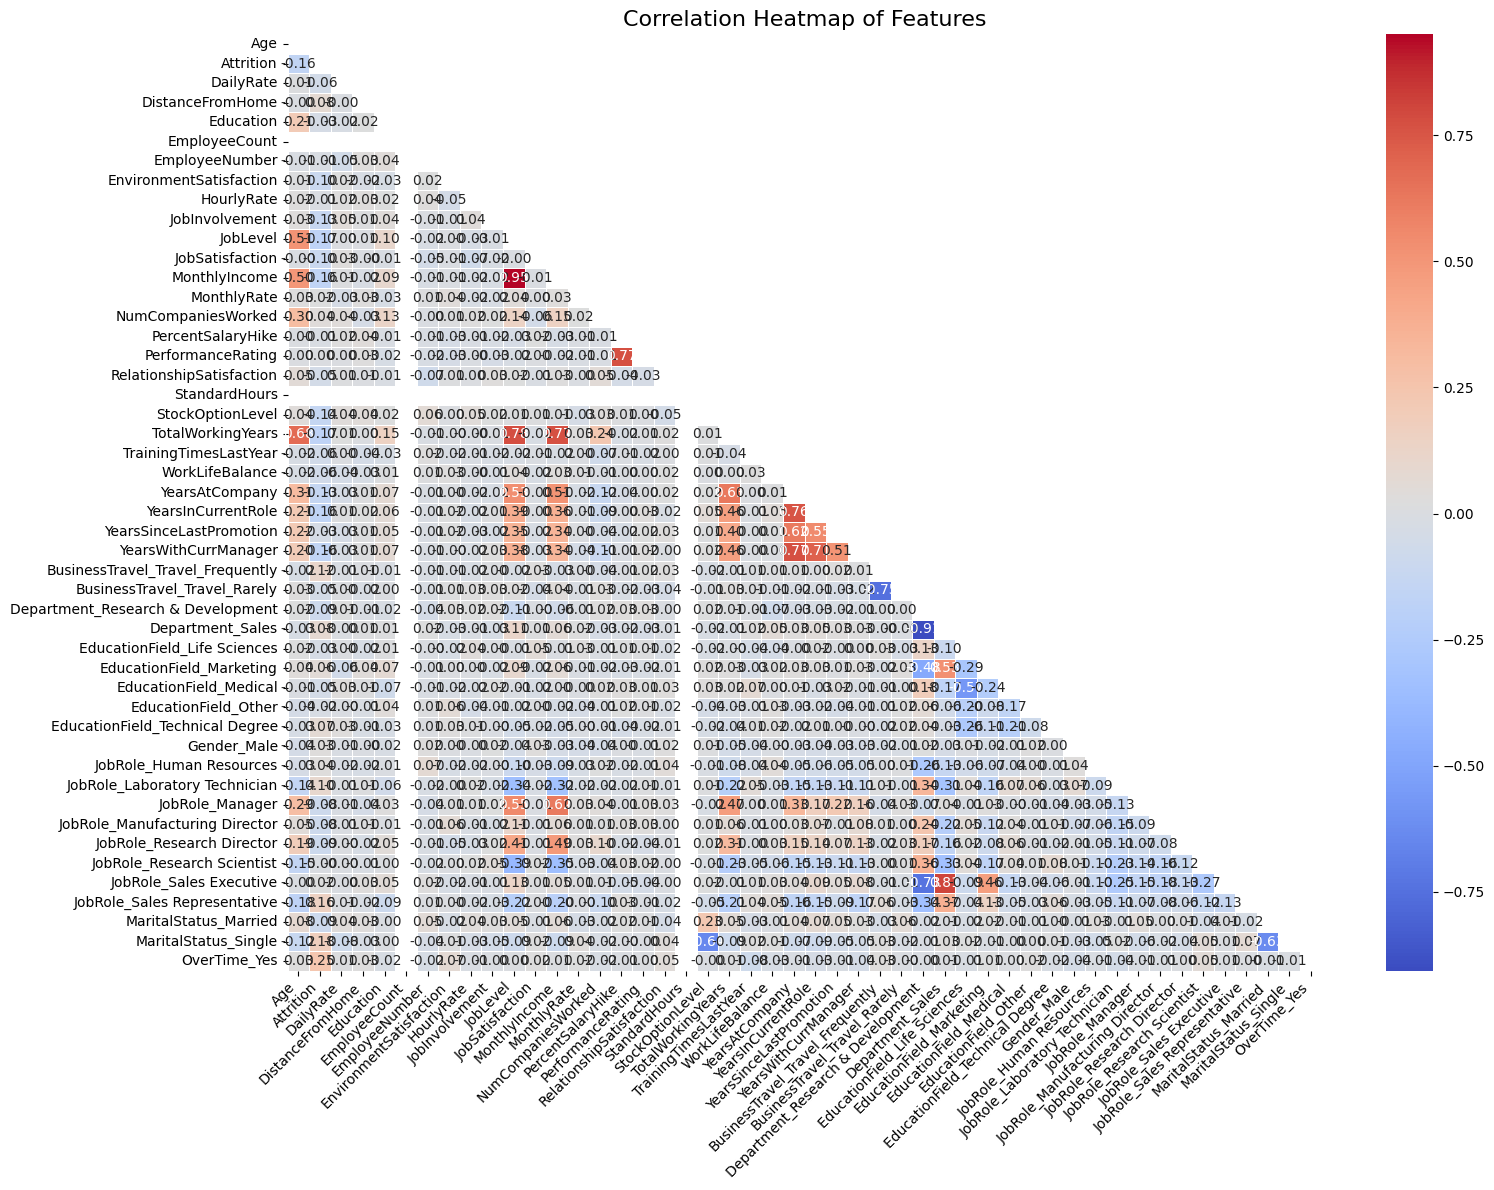

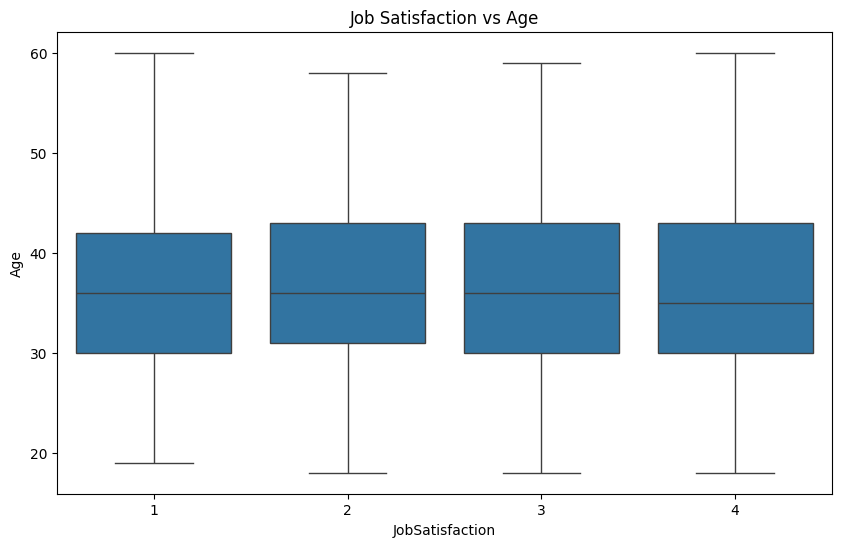

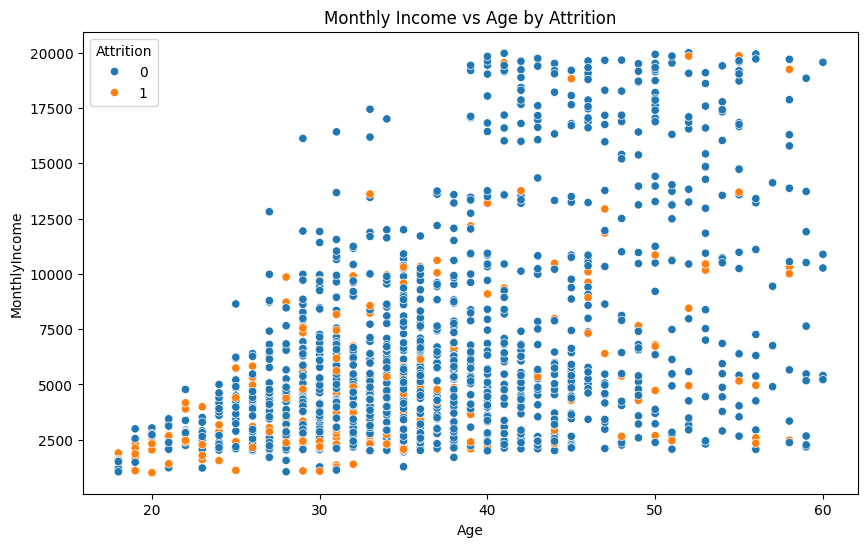

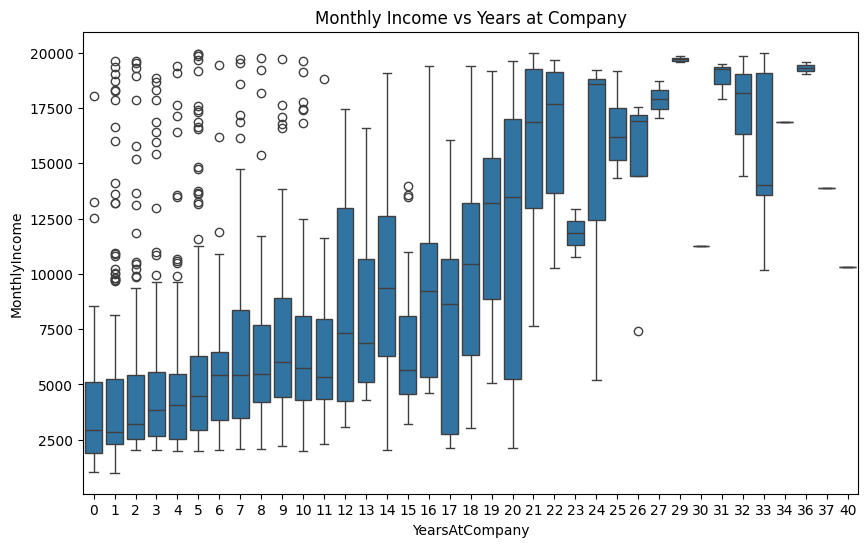

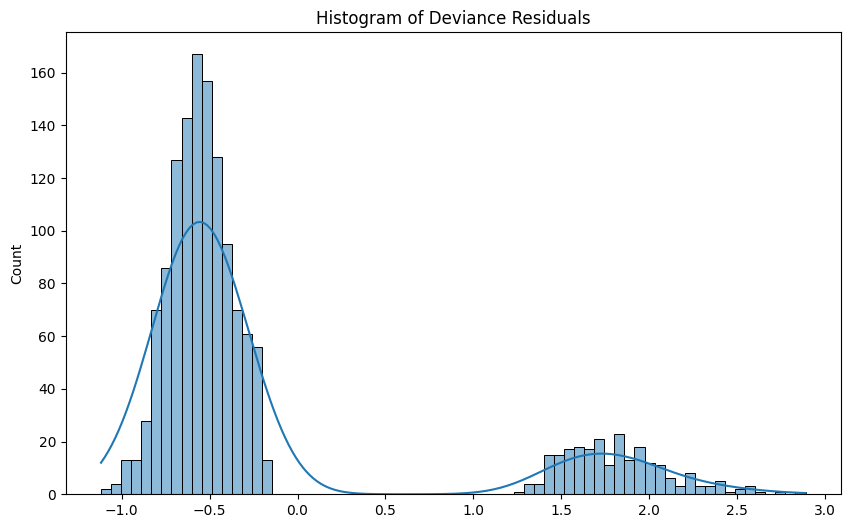

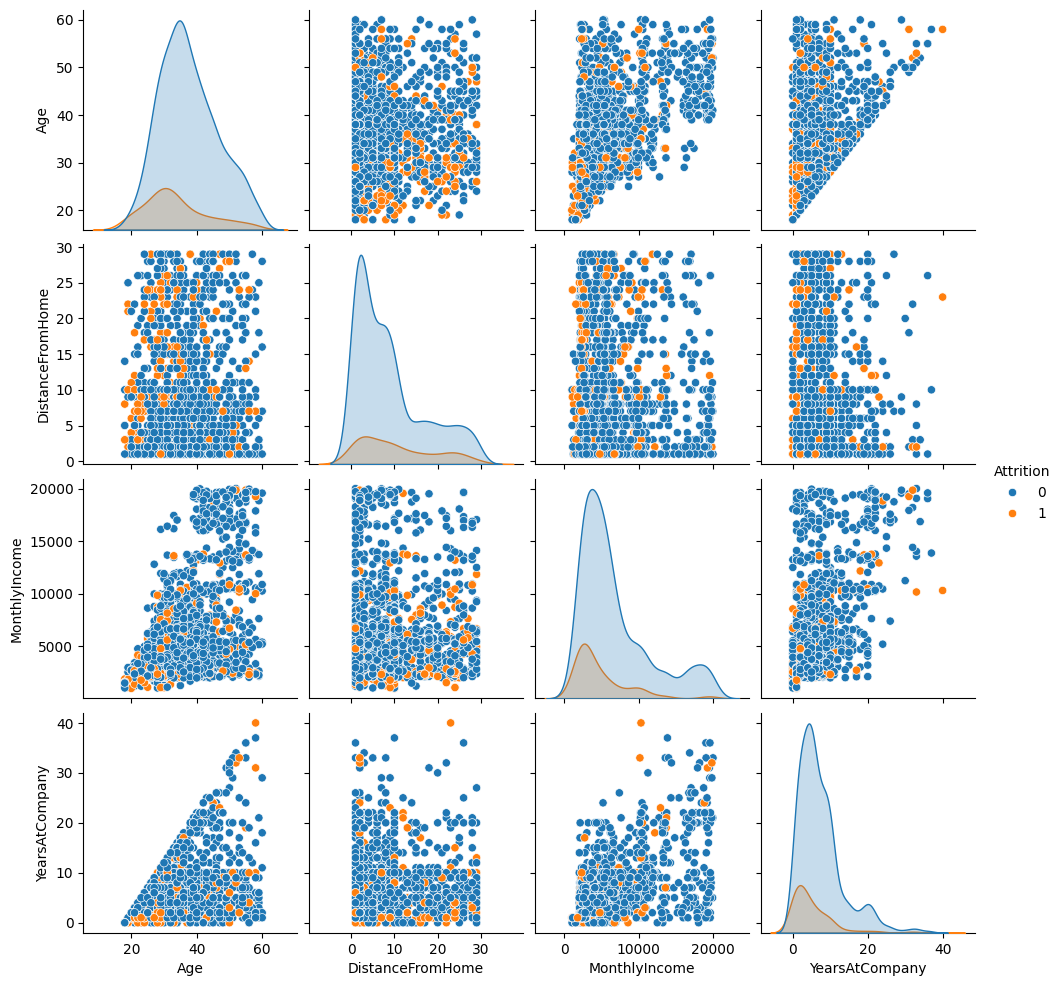

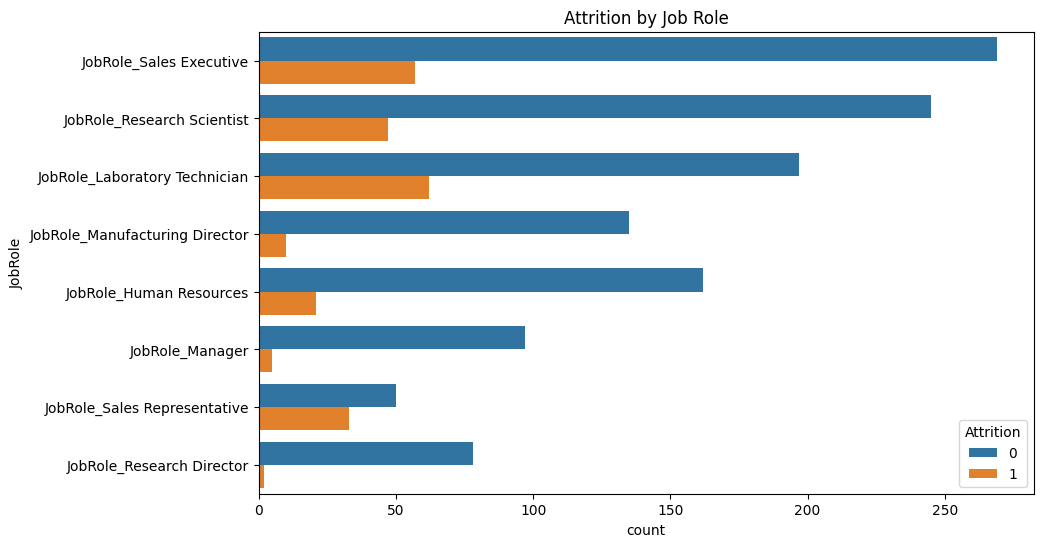

      Metric  Training  Testing
0   Accuracy      0.83     0.86
1  Precision      0.69     0.74
2     Recall      0.83     0.86
3   F1 Score      0.75     0.80
   YearsAtCompany RecommendedSalaryHike
0               7                   Yes
1               4                    No
2               8                   Yes
3               5                   Yes
4               7                   Yes


In [5]:

# EMPLOYEE PERFORMANCE ANALYSIS PROJECT

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Load the dataset
data = pd.read_csv('/content/HR_Analytics.csv')

# Data Preprocessing
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['MonthlyIncome'] = pd.to_numeric(data['MonthlyIncome'], errors='coerce')

# One-hot encode categorical columns and handle missing data
data = pd.get_dummies(data, drop_first=True)
data.fillna(data.mean(), inplace=True)

# Logistic Regression Model
X = data[['Age', 'DistanceFromHome', 'MonthlyIncome', 'JobSatisfaction']]
y = data['Attrition']
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

# Correlation Heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

# Boxplot: Job Satisfaction vs Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobSatisfaction', y='Age', data=data)
plt.title('Job Satisfaction vs Age')
plt.savefig('boxplot_satisfaction_vs_age.png')
plt.show()

# Scatter Plot: Monthly Income vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=data)
plt.title('Monthly Income vs Age by Attrition')
plt.savefig('scatter_income_vs_age.png')
plt.show()

# Example of replacing 'Productivity' with a valid column
plt.figure(figsize=(10, 6))
sns.boxplot(x='YearsAtCompany', y='MonthlyIncome', data=data)  # Replace with a valid column from your dataset
plt.title('Monthly Income vs Years at Company')
plt.savefig('boxplot_income_vs_years_at_company.png')
plt.show()

# Histogram of Deviance Residuals
residuals = model.resid_dev
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Deviance Residuals')
plt.savefig('histogram_deviance_residuals.png')
plt.show()

# Pairplot with Attrition
sns.pairplot(data, hue='Attrition', vars=['Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany'])  # Replace with relevant columns
plt.savefig('pairplot_attrition.png')
plt.show()

# Attrition by Job Role
job_role_columns = [
    'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager',
    'JobRole_Manufacturing Director', 'JobRole_Research Director',
    'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative'
]
data['JobRole'] = data[job_role_columns].idxmax(axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(y='JobRole', hue='Attrition', data=data)
plt.title('Attrition by Job Role')
plt.savefig('countplot_attrition_by_jobrole.png')
plt.show()

# Model Performance Metrics
performance_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Training': [0.83, 0.69, 0.83, 0.75],
    'Testing': [0.86, 0.74, 0.86, 0.80]
})
print(performance_metrics)

# Results - Productivity and Salary Hike Recommendation (Use other columns if you don't have these)
results = pd.DataFrame({
    'YearsAtCompany': [7, 4, 8, 5, 7],
    'RecommendedSalaryHike': ['Yes', 'No', 'Yes', 'Yes', 'Yes']
})
print(results)


